In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

# set the  fontsize and some other elements
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# Print Version
print(mpl.__version__)  
print(sns.__version__)  

3.5.1
0.11.2


## 3、排序 （Ranking）

### 有序条形图 （Ordered Bar Chart）

有序条形图有效地传达了项目的排名顺序。 但是，在图表上方添加度量标准的值，用户可以从图表本身获取精确信息。

C:\Users\10131\anaconda3\envs\rdenv\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


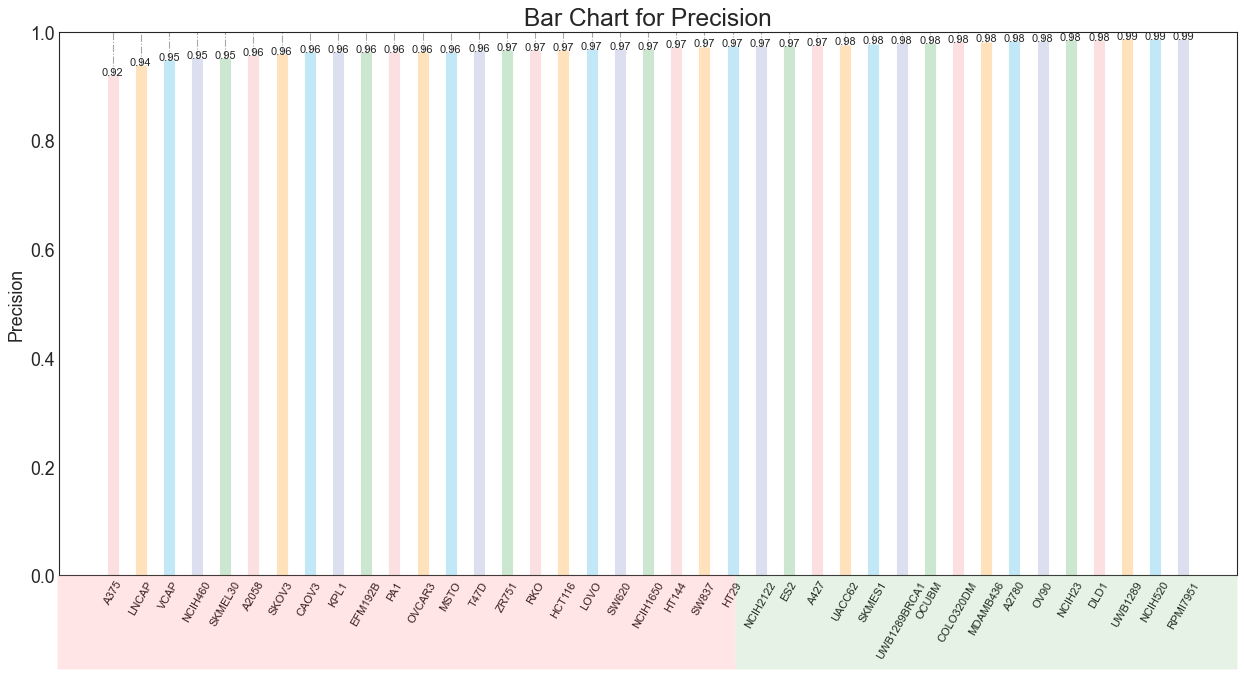

In [2]:
# Prepare Data
df_raw = pd.read_csv("data-mixed/classification.csv")
df = df_raw[['cell_line', 'acc']]
df.sort_values('acc', inplace=True)
df.reset_index(inplace=True)

# Draw plot
import matplotlib.patches as patches
# 粉 橙 蓝 灰'#F3F3F4', 紫 绿
colors = ['#FCE0E1','#FFE2BB','#C2E8F7','#DBDFEF','#CCE7CF']
fig, ax = plt.subplots(figsize=(19,9), facecolor='white', dpi= 80)
ax.vlines(x=df.index, ymin=0, ymax=df.acc, colors=colors,  linewidth=10)
ax.vlines(x=df.index, ymin=df.acc, ymax=1, color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')

# Annotate Text
for i, acc in enumerate(df.acc):
    ax.text(i, acc, round(acc, 2), horizontalalignment='center')


# Title, Label, Ticks and Ylim
ax.set_title('Bar Chart for Precision', fontdict={'size':22})
ax.set(ylabel='Precision', ylim=(0, 1))

plt.xticks(df.index, df.cell_line.str.upper(), rotation=60, horizontalalignment='center', fontsize=10)

# Add patches to color the X axis labels
p1 = patches.Rectangle((.57, -0.005), width=.33, height=.13, alpha=.1, facecolor='green', transform=fig.transFigure)
p2 = patches.Rectangle((.124, -0.005), width=.446, height=.13, alpha=.1, facecolor='red', transform=fig.transFigure)
fig.add_artist(p1)
fig.add_artist(p2)
plt.show()

In [3]:
tissue = pd.read_csv('tissue.csv')
tissue_color = pd.read_csv('tissue_color.csv')
cell_color = pd.read_csv('cell_color.csv')

In [4]:
df_raw = pd.read_csv("data-mixed/classification.csv")
df_raw.describe()

,acc,prec,recall,f1,roc_auc,kappa
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,0.969021,0.811360,0.762242,0.782484,0.873592,0.765566
std,0.013979,0.070566,0.104213,0.077094,0.050873,0.078534
min,0.920421,0.649635,0.466667,0.551181,0.728131,0.534450
25%,0.963136,0.757979,0.713172,0.735448,0.851416,0.718704
50%,0.968988,0.827957,0.782609,0.785714,0.884991,0.767687
75%,0.979518,0.858259,0.845757,0.828525,0.916021,0.811160
max,0.987349,0.929825,0.929515,0.902128,0.948707,0.894679


C:\Users\10131\anaconda3\envs\rdenv\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


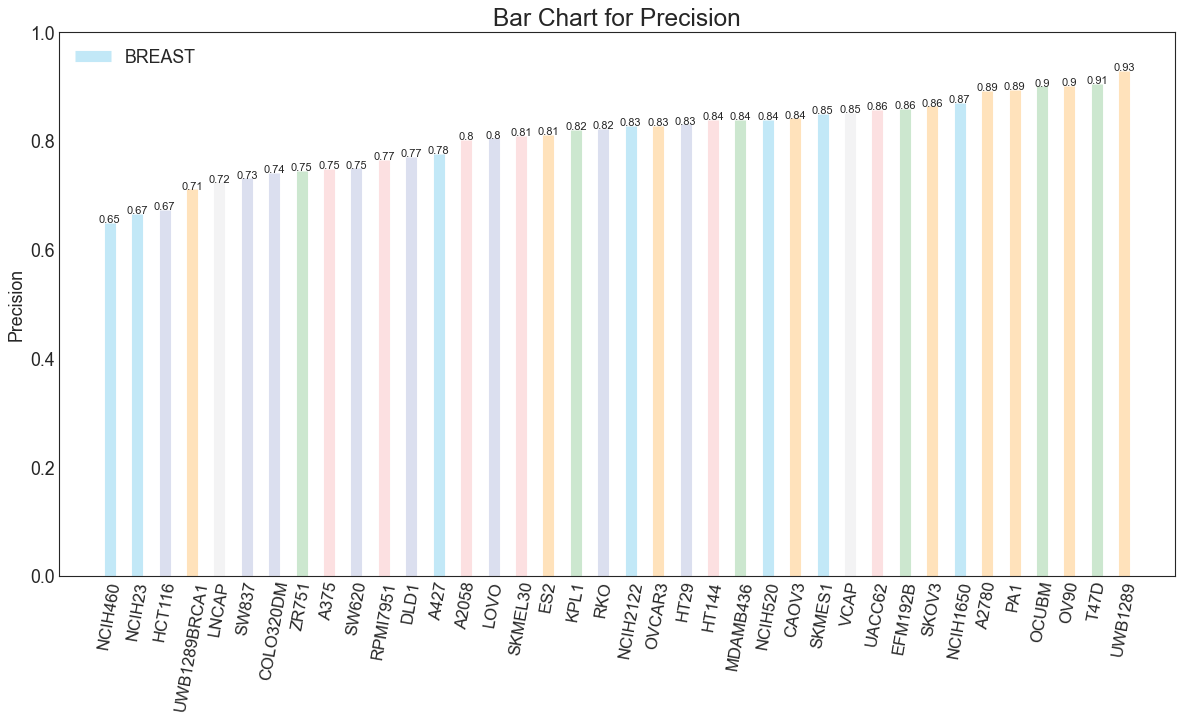

In [5]:
# Prepare Data
df_raw = pd.read_csv("data-mixed/classification.csv")
df_raw = pd.merge(df_raw,cell_color,left_on='cell_line',right_on='cell_line',how='inner')
df = df_raw[['cell_line', 'prec','color']]
df.sort_values('prec', inplace=True)
df.reset_index(inplace=True)

# Draw plot
import matplotlib.patches as patches
# 粉 橙 蓝 灰'#F3F3F4', 紫 绿
colors = ['#FCE0E1','#FFE2BB','#C2E8F7','#DBDFEF','#CCE7CF']
fig, ax = plt.subplots(figsize=(18,9), facecolor='white', dpi= 80)
# ax2 = plt.subplots(figsize=(18,9), facecolor='white', dpi= 80)

ax.vlines(x=df.index, ymin=0, ymax=df.prec, colors=df.color,  linewidth=10)
# ax.vlines(x=df.index, ymin=df.prec, ymax=1, color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')

# Annotate Text
for i, acc in enumerate(df.prec):
    ax.text(i, acc, round(acc, 2), horizontalalignment='center')

plt.legend({tis:col for tis, col in zip(np.unique(tissue_color['tissue']).tolist(), np.unique(tissue_color['color']).tolist())},loc='upper left')
#plt.legend(loc='upper left')
# Title, Label, Ticks and Ylim
ax.set_title('Bar Chart for Precision', fontdict={'size':22})
ax.set(ylabel='Precision', ylim=(0, 1))

plt.xticks(df.index, df.cell_line.str.upper(), rotation=80, horizontalalignment='center', fontsize=15)

# Add patches to color the X axis labels
#p1 = patches.Rectangle((.57, -0.005), width=.33, height=.13, alpha=.1, facecolor='green', transform=fig.transFigure)
#p2 = patches.Rectangle((.124, -0.005), width=.446, height=.13, alpha=.1, facecolor='red', transform=fig.transFigure)
#fig.add_artist(p1)
#fig.add_artist(p2)
plt.show()

### 箱形图 （Box Plot）

箱形图是一种可视化分布的好方法，记住中位数、第25个第45个四分位数和异常值。 但是，您需要注意解释可能会扭曲该组中包含的点数的框的大小。 因此，手动提供每个框中的观察数量可以帮助克服这个缺点。

例如，左边的前两个框具有相同大小的框，即使它们的值分别是5和47。 因此，写入该组中的观察数量是必要的。

In [ ]:
# Import Data
df = pd.read_csv("data-mixed/regression.csv")

# Draw Plot
plt.figure(figsize=(18,9), dpi= 80)
sns.boxplot(x='cell_line', y='mse', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values
    for (x, xticklabel), n_ob in zip(enumerate(xticklabels), n_obs):
        plt.text(x, medians_dict[xticklabel]*1.01, "#obs : "+str(n_ob), horizontalalignment='center', fontdict={'size':14}, color='white')

add_n_obs(df,group_col='class',y='hwy')    

# Decoration
plt.title('Box Plot of Highway Mileage by Vehicle Class', fontsize=22)
plt.ylim(10, 40)
plt.show()

In [19]:
f = open('organ.txt')
organ = f.read()
list_organ = organ.split(sep=' ')

/tmp/ipykernel_4148191/3793410458.py:1: ResourceWarning: unclosed file <_io.TextIOWrapper name='organ.txt' mode='r' encoding='UTF-8'>
  f = open('organ.txt')


In [30]:
list_cell_line = []
list_tissue = []
for idx,organ in enumerate(list_organ):
    if idx % 2 != 0:
        list_tissue.append(organ)
    else:
        list_cell_line.append(organ)

In [31]:
tissue = pd.DataFrame(columns=['cell_line','tissue'])
tissue['cell_line'] = list_cell_line
tissue['tissue'] = list_tissue
tissue.to_csv('tissue.csv',index=False)

In [39]:
tissue_color = pd.DataFrame(columns=['tissue','color'])
tissue_color['tissue'] = tissue['tissue'].unique()
tissue_color['color'] = ['#FCE0E1','#FFE2BB','#C2E8F7','#DBDFEF','#CCE7CF','#F3F3F4','#F7F1C3']
tissue_color.to_csv('tissue_color.csv',index=False)

### 小提琴图 （Violin Plot）

小提琴图是箱形图在视觉上令人愉悦的替代品。 小提琴的形状或面积取决于它所持有的观察次数。 但是，小提琴图可能更难以阅读，并且在专业设置中不常用。

In [4]:
tissue = pd.read_csv('tissue.csv')
tissue_color = pd.read_csv('tissue_color.csv')
cell_color = pd.read_csv('cell_color.csv')
df_vil_reg = pd.read_csv('data-mixed/regression.csv')
df_reg = pd.merge(df_vil_reg,cell_color,left_on='cell_line',right_on='cell_line',how='inner')

In [5]:
df_vil_reg = pd.read_csv('data-mixed/regression.csv')
df_reg = pd.merge(df_vil_reg,cell_color,left_on='cell_line',right_on='cell_line',how='inner')

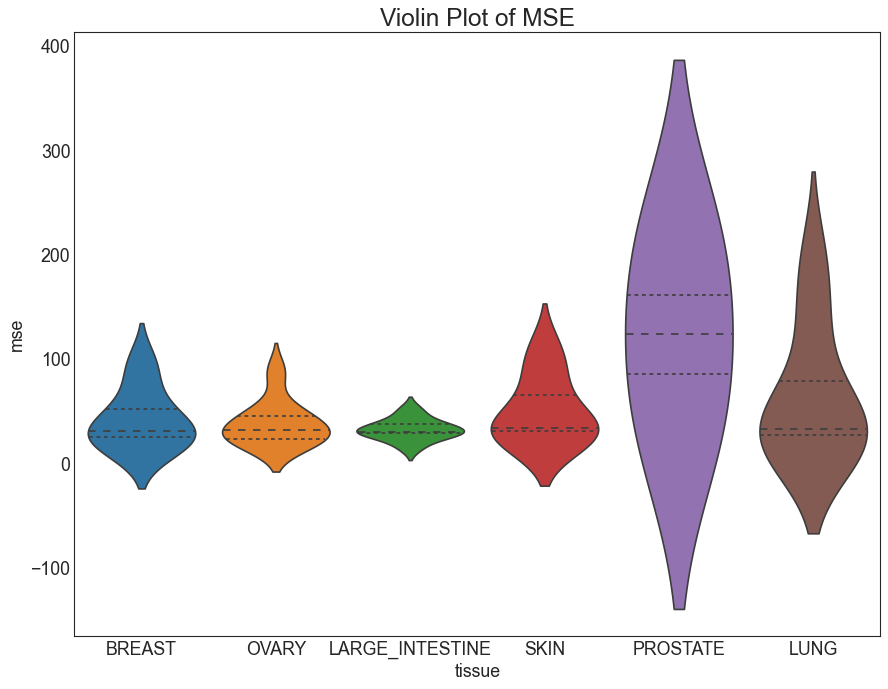

In [8]:
# Import Data
# df = pd.read_csv("example/mpg_ggplot2.csv")
df_reg_vil = df_reg[['mse','tissue']]


# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.violinplot(x='tissue', y='mse', data=df_reg_vil, scale='width', inner='quartile')

# Decoration
plt.title('Violin Plot of MSE', fontsize=22)
plt.show()

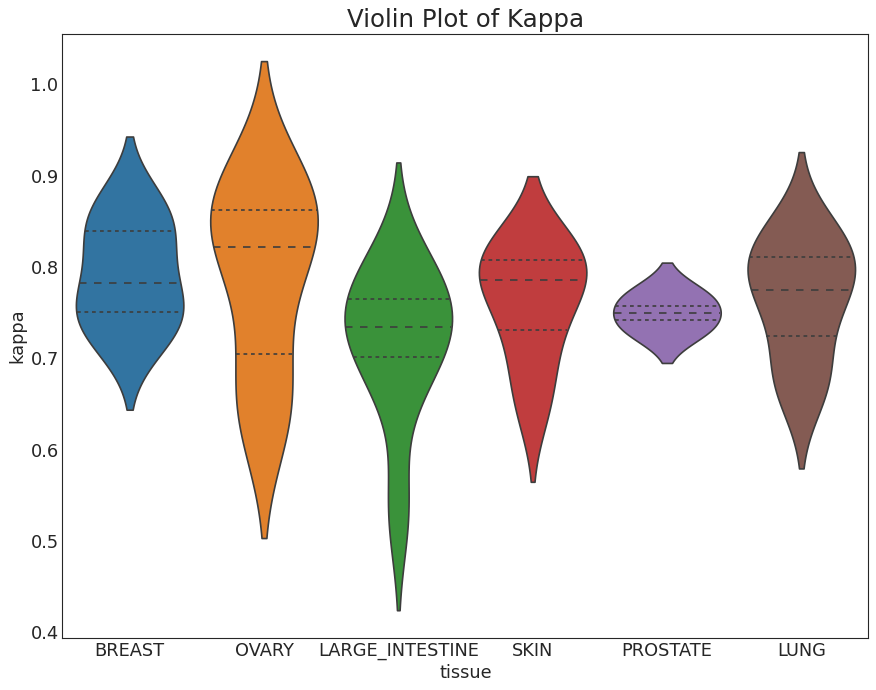

In [19]:
# Import Data
# df = pd.read_csv("example/mpg_ggplot2.csv")
# df_reg_vil = df_reg[['kappa','tissue']]
df_vil = df_raw[['tissue','kappa']]


# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.violinplot(x='tissue', y='kappa', data=df_vil, scale='width', inner='quartile')

# Decoration
plt.title('Violin Plot of Kappa', fontsize=22)
plt.show()

### 包点+箱形图 （Dot + Box Plot）

包点+箱形图 （Dot + Box Plot）传达类似于分组的箱形图信息。 此外，这些点可以了解每组中有多少数据点。

In [9]:
tissue = pd.read_csv('tissue.csv')
tissue_color = pd.read_csv('tissue_color.csv')
cell_color = pd.read_csv('cell_color.csv')
df_vil_reg = pd.read_csv('data-mixed/regression.csv')
df_reg = pd.merge(df_vil_reg,cell_color,left_on='cell_line',right_on='cell_line',how='inner')

C:\Users\10131\anaconda3\envs\rdenv\lib\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
C:\Users\10131\anaconda3\envs\rdenv\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


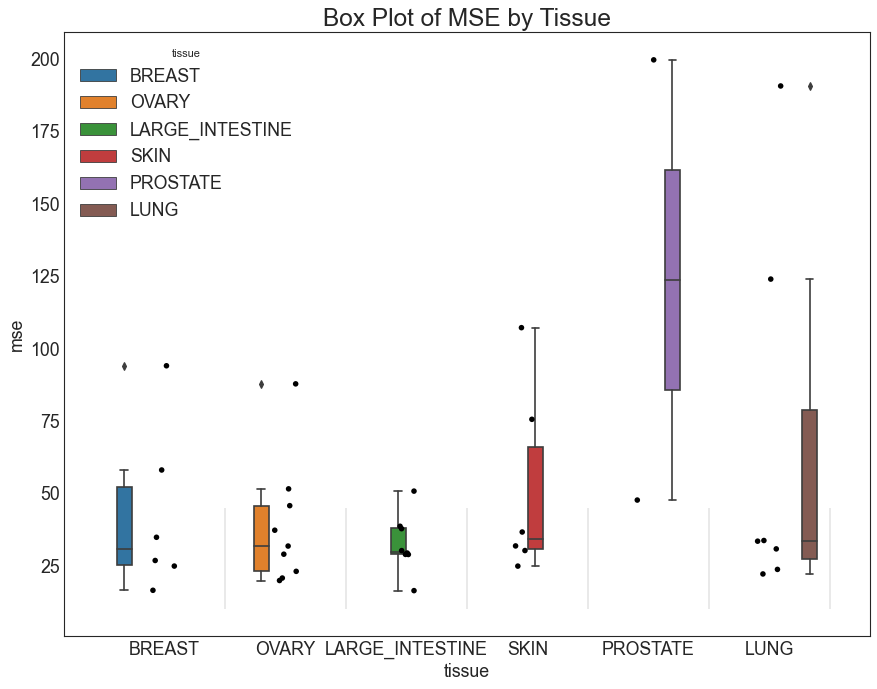

In [13]:
# Import Data
df_dot_box = df_reg[['mse','tissue']]

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='tissue', y='mse', data=df_dot_box, hue='tissue')
sns.stripplot(x='tissue', y='mse', data=df_dot_box, color='black', size=5, jitter=1)

for i in range(6):
    plt.vlines(i+.5, 10, 45, linestyles='solid', colors='gray', alpha=0.2)

# Decoration
plt.title('Box Plot of MSE by Tissue', fontsize=22)
# plt.legend(title='Cylinders')
plt.show()

/home/ubuntu/miniconda3/envs/rdenv/lib/python3.9/site-packages/seaborn/categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
/home/ubuntu/miniconda3/envs/rdenv/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


KeyError: 'tissue'

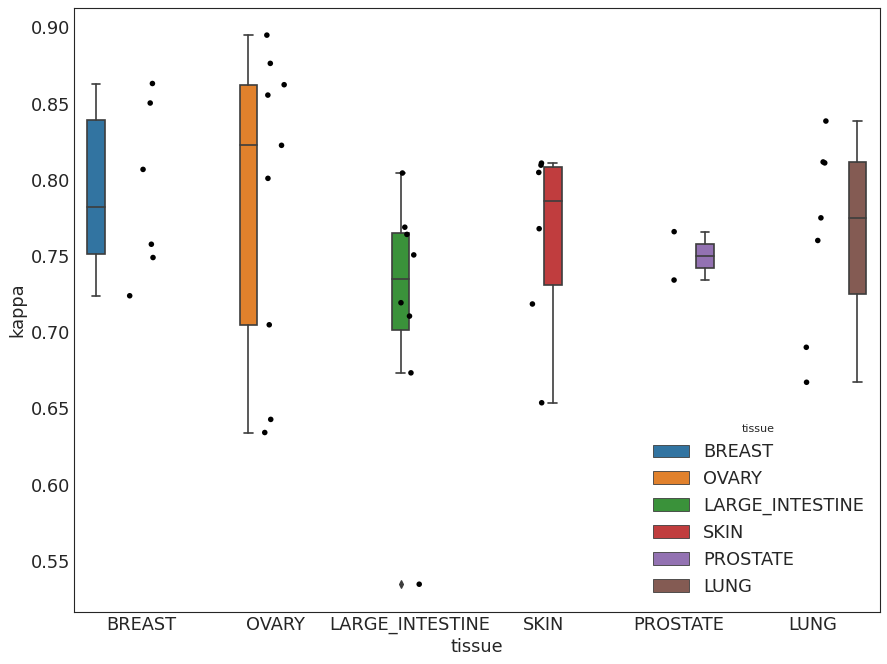

In [7]:
# Import Data
df_dot_box = df_vil

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='tissue', y='kappa', data=df_dot_box, hue='tissue')
sns.stripplot(x='tissue', y='kappa', data=df_dot_box, color='black', size=5, jitter=1)

for i in range(len(df['tissue'])):
    plt.vlines(i+.5, 10, 45, linestyles='solid', colors='gray', alpha=0.2)

# Decoration
plt.title('Box Plot of Highway Mileage by Vehicle Class', fontsize=22)
# plt.legend(title='Cylinders')
plt.show()